DATASET to UPLOAD: Headbrain1, 7282_1

In [1]:
from google.colab import files
uploaded = files.upload()

Saving headbrain1.csv to headbrain1.csv


#**Train-Test Split**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Load dataset from uploaded file
df = pd.read_csv('headbrain1.csv')
df.head()  # Preview the dataset

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [4]:
# Define features (X) and target (y)
X = df['Head Size(cm^3)']  # Independent variable
y = df['Brain Weight(grams)']  # Dependent variable

# Split the data into training and test sets, with a 75-25 split and shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

In [5]:
# Output basic information about the split data
print('X_train : ')
print(X_train.head())  # Print head of training data for X
print(X_train.size)    # Size of training data for X

print('X_test : ')
print(X_test.head())   # Print head of test data for X
print(X_test.size)     # Size of test data for X

print('y_train : ')
print(y_train.head())  # Print head of training data for y
print(y_train.size)    # Size of training data for y

print('y_test : ')
print(y_test.head())   # Print head of test data for y
print(y_test.size)     # Size of test data for y

X_train : 
99     3478
52     4270
184    3479
139    3171
107    3399
Name: Head Size(cm^3), dtype: int64
177
X_test : 
66     3415
113    3594
135    3436
227    4204
68     4430
Name: Head Size(cm^3), dtype: int64
60
y_train : 
99     1270
52     1335
184    1160
139    1127
107    1226
Name: Brain Weight(grams), dtype: int64
177
y_test : 
66     1310
113    1290
135    1235
227    1380
68     1510
Name: Brain Weight(grams), dtype: int64
60


#**Evaluation Method**

##**Simple Evaluation Metrics**

In [ ]:
# Example of real vs predicted labels for binary classification
real = [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]
pred = [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]

# Create a DataFrame to compare real and predicted values
eval_test = pd.DataFrame({'real': real, 'pred': pred})

In [ ]:
# Define a function to assign evaluation status (TP, FP, FN, TN)
def status_teller(input):
  metrics = ''
  if input['real'] == 1 and input['pred'] == 1:
    metrics = 'TP'  # True Positive
  elif input['real'] == 0 and input['pred'] == 1:
    metrics = 'FP'  # False Positive
  elif input['real'] == 1 and input['pred'] == 0:
    metrics = 'FN'  # False Negative
  else:
    metrics = 'TN'  # True Negative
  return metrics

In [ ]:
# Apply the function to get evaluation status for each pair of values
eval_test['status'] = eval_test.apply(status_teller, axis=1)
eval_test

,real,pred,status
0,0,1,FP
1,0,0,TN
2,0,0,TN
3,1,0,FN
4,1,1,TP
5,1,1,TP
6,1,0,FN
7,0,1,FP
8,0,0,TN
9,1,1,TP


In [ ]:
aggregate = eval_test[['real', 'pred']].groupby(['real'])
aggregate_status = aggregate['pred'].count()

agg = aggregate_status.reset_index

In [ ]:
# Aggregate counts of TP, FP, FN, TN
TP_val = len(eval_test[eval_test['status'] == 'TP'])
FP_val = len(eval_test[eval_test['status'] == 'FP'])
FN_val = len(eval_test[eval_test['status'] == 'FN'])
TN_val = len(eval_test[eval_test['status'] == 'TN'])

In [ ]:
# Output the evaluation counts
print('TP = ', TP_val)
print('FP = ', FP_val)
print('FN = ', FN_val)
print('TN = ', TN_val)

TP =  5
FP =  3
FN =  3
TN =  4


In [ ]:
# Calculate Accuracy, Precision, and Recall based on TP, FP, FN, TN
Accuracy = (TP_val + TN_val) / (TP_val + TN_val + FP_val + FN_val)
Precision = TP_val / (TP_val + FP_val)
Recall = TP_val / (TP_val + FN_val)

# Output evaluation metrics
print("Accuracy  = ", Accuracy * 100, "%")
print("Precision = ", Precision * 100, "%")
print("Recall    = ", Recall * 100, "%")

Accuracy  =  60.0 %
Precision =  62.5 %
Recall    =  62.5 %


##**AUROC**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load the iris dataset
iris = load_iris()

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.5,
                                                    random_state=23)

In [ ]:
# Train a Random Forest classifier
clf = OneVsRestClassifier(RandomForestClassifier())

# fit model
clf.fit(X_train, y_train)

# Get predicted class probabilities for the test set
y_pred_prob = clf.predict_proba(X_test)

ROC AUC Score : 0.9868989966555185


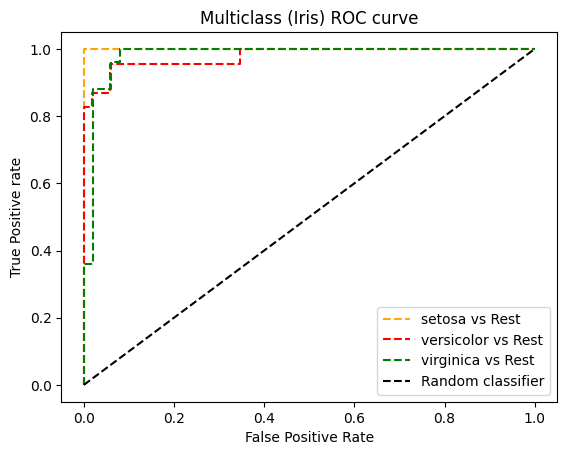

In [ ]:
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print('ROC AUC Score :',roc_auc)

# roc curve for Multi classes
colors = ['orange','red','green']

for i in range(len(iris.target_names)):
    fpr, tpr, thresh = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    plt.plot(fpr, tpr, linestyle='--',color=colors[i], label=iris.target_names[i]+' vs Rest')

# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.title('Multiclass (Iris) ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()

##**Root Mean Square Error (RMSE)**

In [ ]:
import math

# Sample data for RMSE calculation
y_actual = [1, 2, 3, 4, 5]
y_predicted = [1.6, 2.5, 2.9, 3, 4.1]

# Calculate Mean Squared Error (MSE)
MSE = np.square(np.subtract(y_actual, y_predicted)).mean()

# Calculate Root Mean Square Error (RMSE)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.6971370023173351


#**Resampling Technique**

##**K-Fold Cross Validation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
digits = load_digits()

# Train-test split for digits data
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [ ]:
# Train Random Forest model and evaluate accuracy using cross-validation
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9777777777777777

In [ ]:
# Perform 3-fold cross-validation
score_rf = cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target, cv=3)
print(score_rf)
print('Avg :', np.average(score_rf))

[0.93322204 0.94156928 0.92320534]
Avg : 0.9326655537006121


In [ ]:
# Compare scores with different numbers of estimators and cross-validation folds
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5), digits.data, digits.target, cv=10)
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20), digits.data, digits.target, cv=10)
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30), digits.data, digits.target, cv=10)
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target, cv=10)

# Output average cross-validation scores for comparison
print('Avg Score for Estimators=5 and CV=10 :', np.average(scores1))
print('Avg Score for Estimators=20 and CV=10 :', np.average(scores2))
print('Avg Score for Estimators=30 and CV=10 :', np.average(scores3))
print('Avg Score for Estimators=40 and CV=10 :', np.average(scores4))

Avg Score for Estimators=5 and CV=10 : 0.8642147734326505
Avg Score for Estimators=20 and CV=10 : 0.9321104903786466
Avg Score for Estimators=30 and CV=10 : 0.9443544382371197
Avg Score for Estimators=40 and CV=10 : 0.943234016139044


##**Bootstrapping Technique**

In [ ]:
import pandas as pd
import numpy as np

uploaded = files.upload()

Saving 7282_1.csv to 7282_1.csv


In [ ]:
# Load the movie reviews dataset
df = pd.read_csv('7282_1.csv')

# Draw a sample of 500 records from the dataset (random seed ensures reproducibility)
s = df.sample(500, random_state=7)

# Display first few rows of the sample
s.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
17927,Via Regina 1,Hotels,Griante,US,45.987791,9.234449,Grand Hotel Cadenabbia,22011,CO,2013-11-08T00:00:00Z,2016-10-29T03:35:31Z,NaN,NaN,5.0,We stayed here recently for four nights. The h...,"Lakefront with garden patio, good value",NaN,Brett,NaN
17330,24977 Northwestern Hwy,Hotels,Southfield,US,42.472016,-83.241718,Comfort Suites,48076,MI,2015-08-25T00:00:00Z,2016-11-15T21:04:32Z,NaN,NaN,5.0,Very comfortable and clean hotel. Staff was ve...,Would stay again,NaN,Rocky,NaN
33860,460 Waterbury Ct,Hotels,Columbus,US,40.007470,-82.865154,Holiday Inn Express and Suites Gahanna/columbu...,43230,OH,2016-06-27T00:00:00Z,2016-11-04T00:35:23Z,NaN,NaN,5.0,"Nice hotel, tucked away in a quiet section of ...",Close to the Columbus airport,Aurora,Robert M,IL
31485,3391 Peachtree Rd N E,Hotels,Atlanta,US,33.848866,-84.365492,The Westin Buckhead,30326,GA,2016-01-02T00:00:00Z,2016-08-03T21:07:14Z,NaN,NaN,4.0,We were on our way back from D.C. And decided ...,Horrible bed,NaN,Quyen,NaN
6159,457 Mountain Village Blvd,Hotels,Telluride,US,37.933273,-107.850865,Mountain Lodge At Telluride - A Noble House Re...,81435,Pandora,2015-12-11T00:00:00Z,2016-11-16T04:20:44Z,NaN,NaN,5.0,"Great friendly service, great amenities, spaci...",Unforgettable!,Webster,A Traveler,NY


<Axes: >

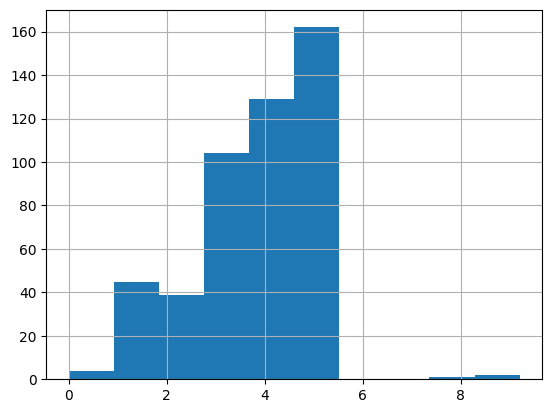

In [ ]:
# Plot a histogram of the 'reviews.rating' column to visualize its distribution
s['reviews.rating'].hist()

In [ ]:
# Generate summary statistics for 'reviews.rating'
s['reviews.rating'].describe()

,reviews.rating
count,486.000000
mean,3.677984
std,1.368945
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,9.200000


In [ ]:
# Bootstrap resampling: Generate 1000 bootstrap samples and compute mean rating for each
bootstrap = pd.DataFrame({'mean_rating': [s.sample(500, replace=True)['reviews.rating'].mean() for i in range(1000)]})
bootstrap

,mean_rating
0,3.611066
1,3.592723
2,3.688935
3,3.677959
4,3.722746
...,...
995,3.636289
996,3.727824
997,3.672131
998,3.676171


<Axes: >

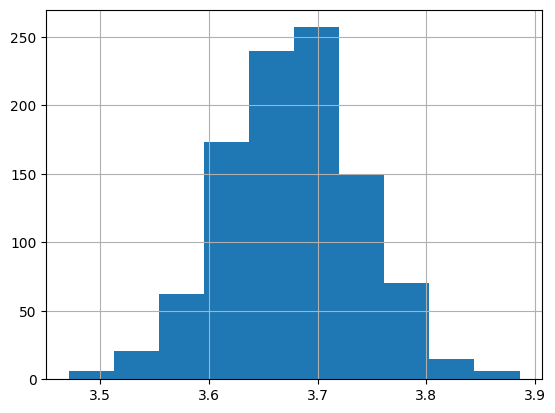

In [ ]:
# Plot the distribution of the bootstrap mean ratings
bootstrap['mean_rating'].hist()

In [ ]:
# Calculate the 95% confidence interval using the 2.5th and 97.5th percentiles of the bootstrap means
(bootstrap['mean_rating'].quantile(0.025), bootstrap['mean_rating'].quantile(0.975))

(3.5535811772028096, 3.7967371134020618)

In [ ]:
# Compare the bootstrap mean with the original dataset's mean rating
df['reviews.rating'].mean()

3.7764308131241084

##**Undersampling and Oversampling Technique**

In [ ]:
# Creating the modeling dataset
from sklearn.datasets import make_classification

# Data processing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
# Create a highly imbalanced synthetic dataset
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2, n_redundant=0, n_classes=2,
                           weights=[0.995, 0.005], class_sep=0.5, random_state=0)

# Convert the synthetic dataset to a pandas DataFrame for ease of use
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

# Check the class distribution (expected imbalance)
df['target'].value_counts(normalize=True)

,proportion
target,
0,0.98972
1,0.01028


<Axes: xlabel='feature1', ylabel='feature2'>

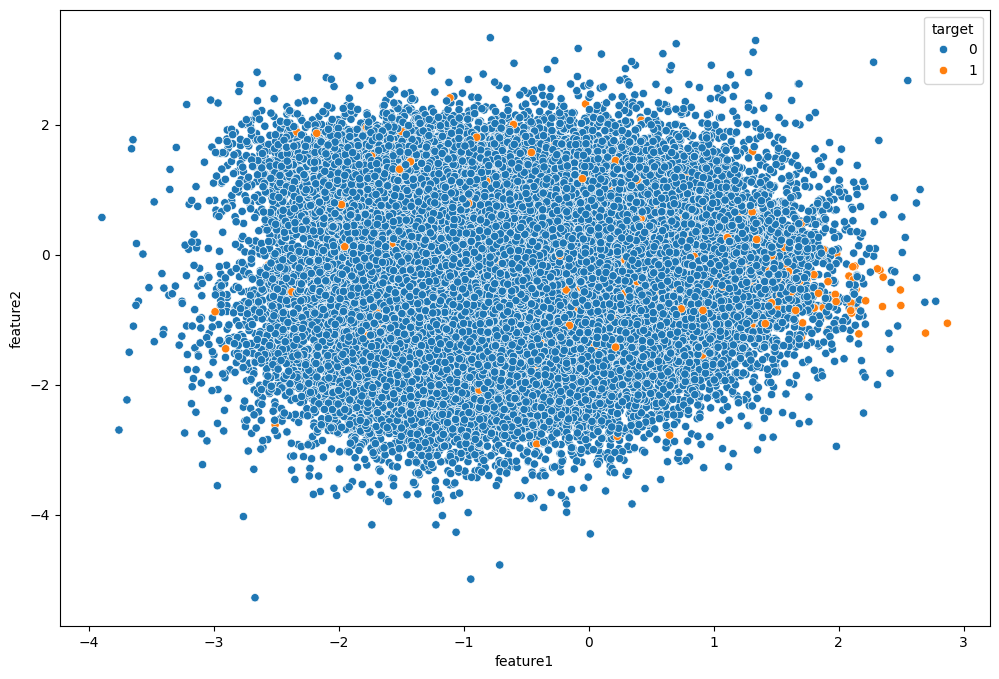

In [ ]:
# Visualize the dataset, colored by class label
plt.figure(figsize=(12, 8))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df)

In [ ]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the number of records in the training and test datasets
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

# Display the class distribution in the training dataset (majority vs minority)
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 80000
The number of records in the test dataset is 20000
The training dataset has 79166 records for the majority class and 834 records for the minority class.


In [ ]:
# Train a baseline RandomForest model on the imbalanced dataset
rf = RandomForestClassifier()
baseline_model = rf.fit(X_train, y_train)
baseline_prediction = baseline_model.predict(X_test)

# Evaluate the performance of the baseline model (imbalanced data)
print(classification_report(y_test, baseline_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19806
           1       0.00      0.00      0.00       194

    accuracy                           0.99     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



###Undersampling

Random Undersampling

In [ ]:
# Randomly under-sample the majority class to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print(sorted(Counter(y_train_rus).items()))

[(0, 834), (1, 834)]


Text(0.5, 1.0, 'Random Under Sampling')

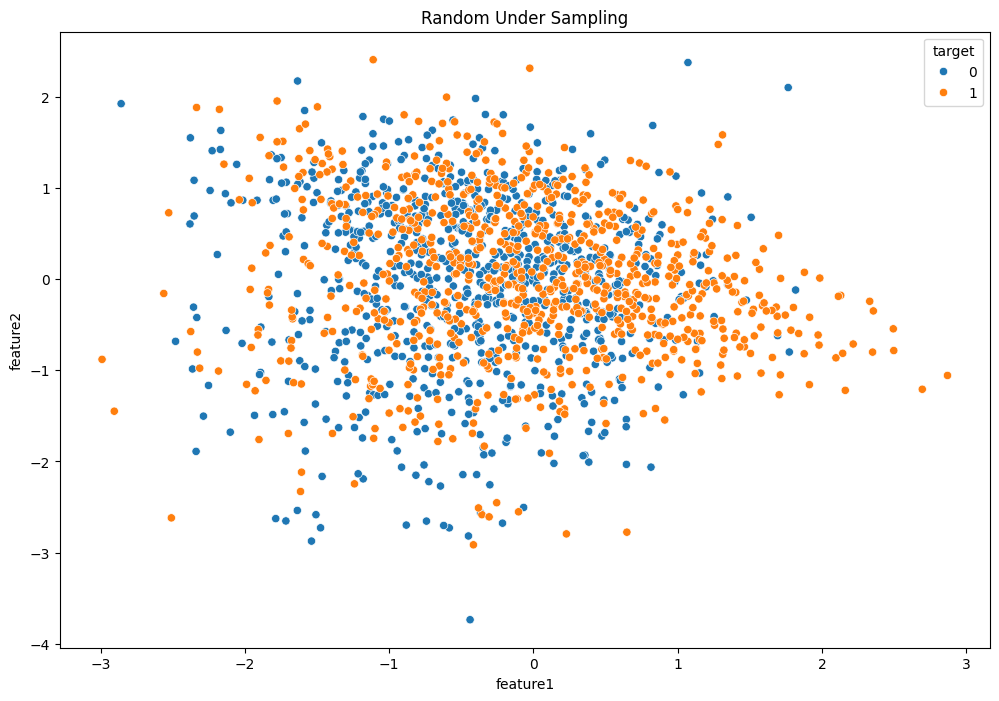

In [ ]:
# Convert the resampled data into a pandas DataFrame
df_rus = pd.DataFrame({'feature1': X_train_rus[:, 0], 'feature2': X_train_rus[:, 1], 'target': y_train_rus})

# Visualize the resampled dataset
plt.figure(figsize=(12, 8))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df_rus)
plt.title('Random Under Sampling')

In [ ]:
# Train a RandomForest model on the under-sampled data
rus_model = rf.fit(X_train_rus, y_train_rus)
rus_prediction = rus_model.predict(X_test)

# Evaluate the model trained on the under-sampled dataset
print(classification_report(y_test, rus_prediction))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     19806
           1       0.01      0.53      0.02       194

    accuracy                           0.59     20000
   macro avg       0.50      0.56      0.38     20000
weighted avg       0.98      0.59      0.74     20000



Near-Miss Undersampling

In [ ]:
# Apply NearMiss undersampling to reduce the majority class instances
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)

# Check the class distribution after NearMiss undersampling
print(sorted(Counter(y_train_nearmiss).items()))

[(0, 834), (1, 834)]


Text(0.5, 1.0, 'NearMiss Under Sampling')

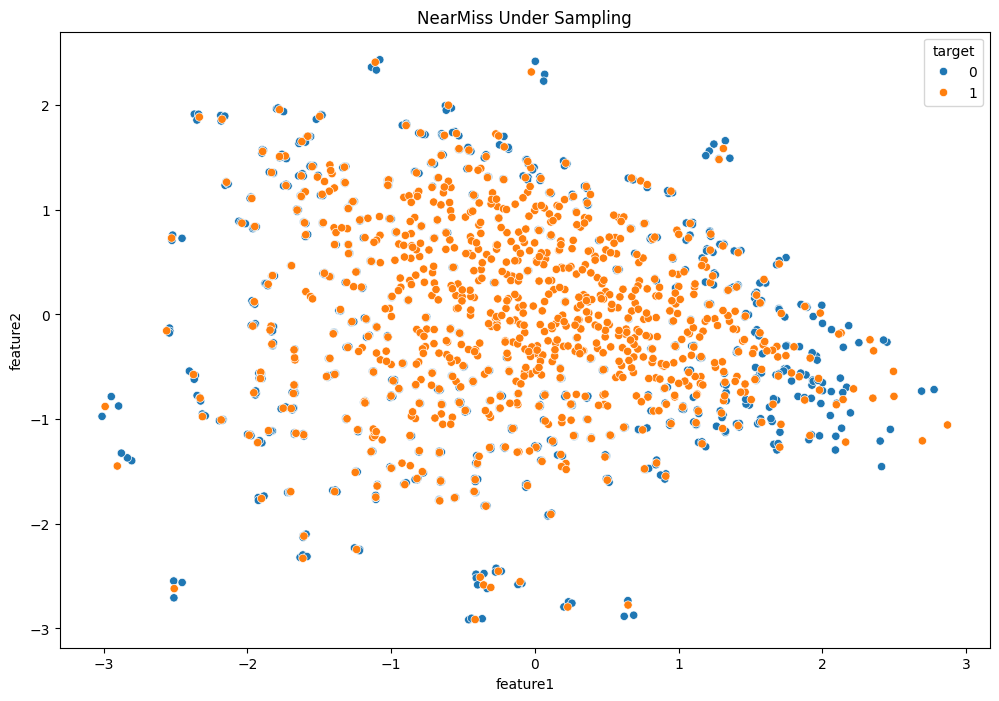

In [ ]:
# Visualize the dataset after NearMiss undersampling
df_nearmiss = pd.DataFrame({'feature1': X_train_nearmiss[:, 0], 'feature2': X_train_nearmiss[:, 1], 'target': y_train_nearmiss})
plt.figure(figsize=(12, 8))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df_nearmiss)
plt.title('NearMiss Under Sampling')

In [ ]:
# Train a RandomForest model on the NearMiss undersampled data
nearmiss_model = rf.fit(X_train_nearmiss, y_train_nearmiss)
nearmiss_prediction = nearmiss_model.predict(X_test)

# Evaluate the model trained on NearMiss undersampled data
print(classification_report(y_test, nearmiss_prediction))

              precision    recall  f1-score   support

           0       0.99      0.39      0.56     19806
           1       0.01      0.62      0.02       194

    accuracy                           0.39     20000
   macro avg       0.50      0.50      0.29     20000
weighted avg       0.98      0.39      0.55     20000



###Oversampling

Random Oversampling

In [ ]:
# Randomly over-sample the minority class to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print(sorted(Counter(y_train_ros).items()))

[(0, 79166), (1, 79166)]


Text(0.5, 1.0, 'Random Over Sampling')

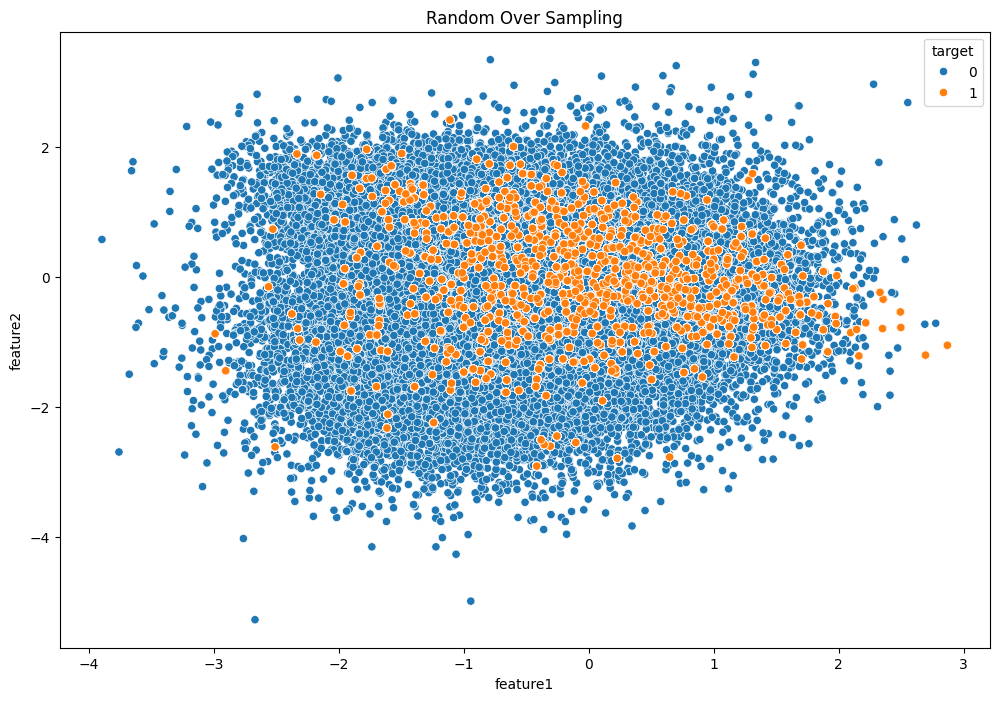

In [ ]:
# Visualize the oversampled dataset
df_ros = pd.DataFrame({'feature1': X_train_ros[:, 0], 'feature2': X_train_ros[:, 1], 'target': y_train_ros})
plt.figure(figsize=(12, 8))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df_ros)
plt.title('Random Over Sampling')

In [ ]:
# Train a RandomForest model on the oversampled data
ros_model = rf.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(X_test)

# Evaluate the model trained on the oversampled dataset
print(classification_report(y_test, ros_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19806
           1       0.03      0.01      0.01       194

    accuracy                           0.99     20000
   macro avg       0.51      0.50      0.50     20000
weighted avg       0.98      0.99      0.98     20000



SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
# Apply SMOTE to generate synthetic examples of the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print(sorted(Counter(y_train_smote).items()))

[(0, 79166), (1, 79166)]


Text(0.5, 1.0, 'SMOTE Over Sampling')

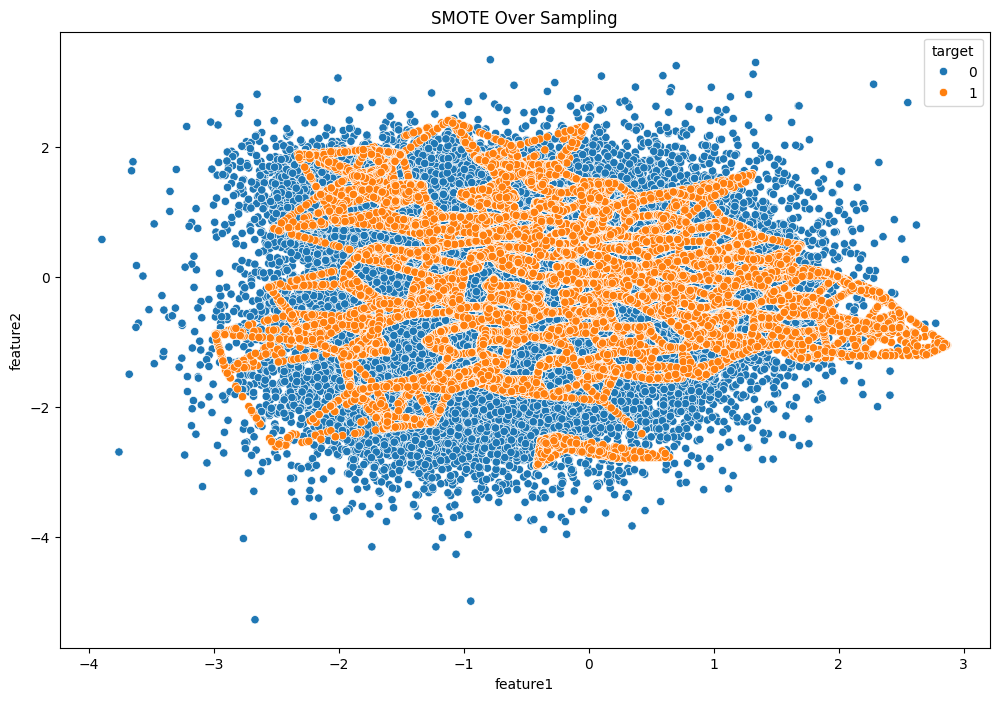

In [ ]:
# Visualize the dataset after SMOTE oversampling
df_smote = pd.DataFrame({'feature1': X_train_smote[:, 0], 'feature2': X_train_smote[:, 1], 'target': y_train_smote})
plt.figure(figsize=(12, 8))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df_smote)
plt.title('SMOTE Over Sampling')

In [ ]:
# Train a RandomForest model on the SMOTE oversampled data
smote_model = rf.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(X_test)

# Evaluate the model trained on the SMOTE oversampled dataset
print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     19806
           1       0.01      0.27      0.03       194

    accuracy                           0.82     20000
   macro avg       0.50      0.55      0.47     20000
weighted avg       0.98      0.82      0.89     20000

